# import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read dataset

In [2]:
df = pd.read_csv('iris_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


# calculate statistics

In [3]:
df_list = []

for i in range(3):
    new_df = pd.DataFrame()
    column_name = f"mean_class_{i}"
    new_df[column_name] = df[df['target'] == i].mean(axis=0)
    column_name = f"std_class_{i}"
    new_df[column_name] = df[df['target'] == i].var(axis=0)
    column_name = f"range_class_{i}"
    new_df[column_name] = df[df['target'] == i].max() - df[df['target'] == i].min()
    new_df = new_df[:-1]
    df_list.append(new_df)

In [4]:
for df_item in df_list:
    print(df_item.info())
    print('\n------\n')

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, sepal length (cm) to petal width (cm)
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mean_class_0   4 non-null      float64
 1   std_class_0    4 non-null      float64
 2   range_class_0  4 non-null      float64
dtypes: float64(3)
memory usage: 128.0+ bytes
None

------

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, sepal length (cm) to petal width (cm)
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mean_class_1   4 non-null      float64
 1   std_class_1    4 non-null      float64
 2   range_class_1  4 non-null      float64
dtypes: float64(3)
memory usage: 128.0+ bytes
None

------

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, sepal length (cm) to petal width (cm)
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------       

# calculate corr matrix for each class

In [5]:
corr_list = []

for i in range(3):
    new_df = df[df['target']== i].iloc[:, :-1]
    corr_list.append(new_df.corr())

for corr_item in corr_list:
    print(corr_item)
    print('\n-----------\n')


                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000          0.742547           0.267176   
sepal width (cm)            0.742547          1.000000           0.177700   
petal length (cm)           0.267176          0.177700           1.000000   
petal width (cm)            0.278098          0.232752           0.331630   

                   petal width (cm)  
sepal length (cm)          0.278098  
sepal width (cm)           0.232752  
petal length (cm)          0.331630  
petal width (cm)           1.000000  

-----------

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000          0.525911           0.754049   
sepal width (cm)            0.525911          1.000000           0.560522   
petal length (cm)           0.754049          0.560522           1.000000   
petal width (cm)            0.546461          0.663999           0.786668   

                   petal

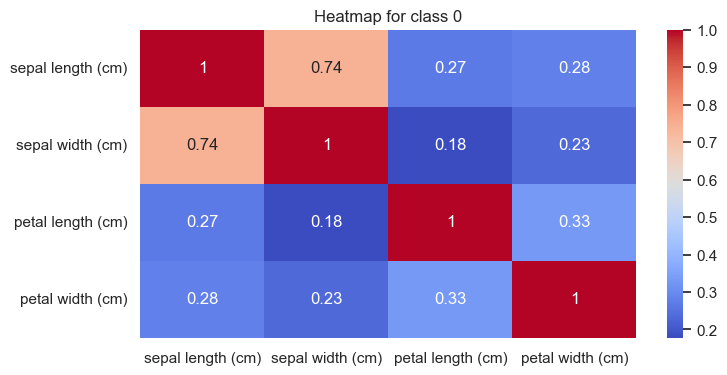

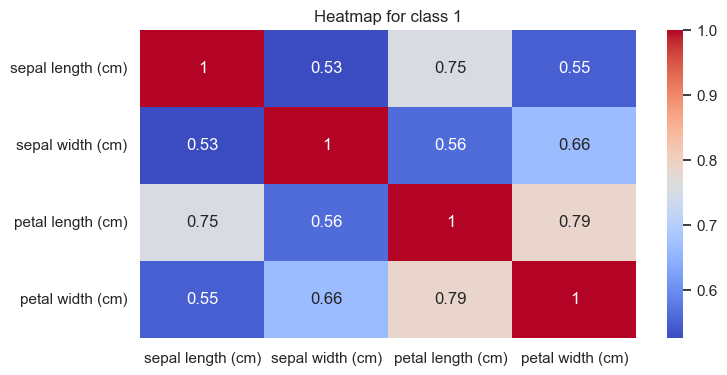

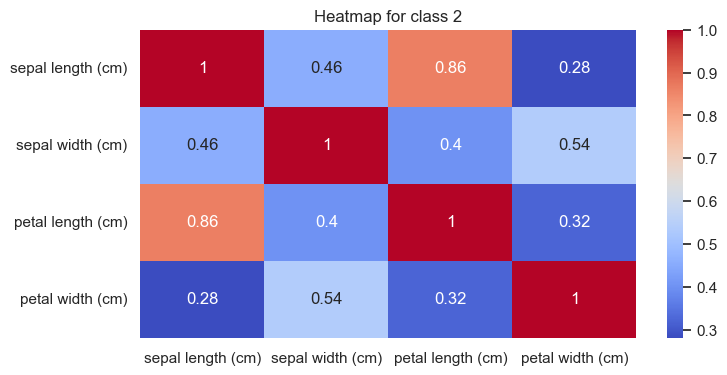

In [9]:
# Set Seaborn style
sns.set(style="whitegrid")

# Plot heatmap for each class
for i, corr_item in enumerate(corr_list):
    plt.figure(figsize=(8, 4))
    
    sns.heatmap(corr_item, annot=True, cmap='coolwarm', cbar=True)
    plt.title(f'Heatmap for class {i}')
    plt.show()

* in class 0 sepal width and height has big corr values
* in class 1 sepal length and petal length, petal width and petal length have big corr values
* in class 2 petal length and sepal length have big corr values

corr values show how variables are linearly dependent to each other. values near (+-1) shows big dependens and values near 0 show small dependence. the + sign shows increasing one variable values causes increasing the other variable's size and the - shows increasing one's values cause decreasing value of another one.